In [43]:
import torch
import numpy as np

embedding_path = "wikitext_bert_embeddings.pt"

embeddings = torch.load(embedding_path)
embeddings.shape


/tmp/ipykernel_113283/2383193386.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(embedding_path)


torch.Size([36718, 1024])

In [44]:

x = embeddings.to('cpu').detach().numpy().copy()
x.shape


(36718, 1024)

In [3]:
import numpy as np
x = np.load("gensim_embeddings/wikitext_word2vec_embeddings.npy")
x.shape


(36718, 300)

In [4]:
from sklearn.decomposition import PCA

def pca_variance(firings: np.array) -> tuple[np.array, np.array]:
    """
    Shape が (#data, vec_size) の ニューロン発火行列のPC次元解析をします.

    Args:
        firings (np.array): Shape is (#data, vec_size)

    Returns:
        Tuple[np.array, np.array]: Shape of pc_dim and var: (vec_size, )
    """
    pca = PCA().fit(firings)
    n_hid = firings.shape[1]
    pc_dim = np.arange(n_hid) + 1
    pc_var = pca.explained_variance_
    return pc_dim, pc_var


In [5]:
pc_dim, pc_var = pca_variance(x)


In [6]:
log_pc_dim, log_var = np.log(pc_dim), np.log(pc_var)


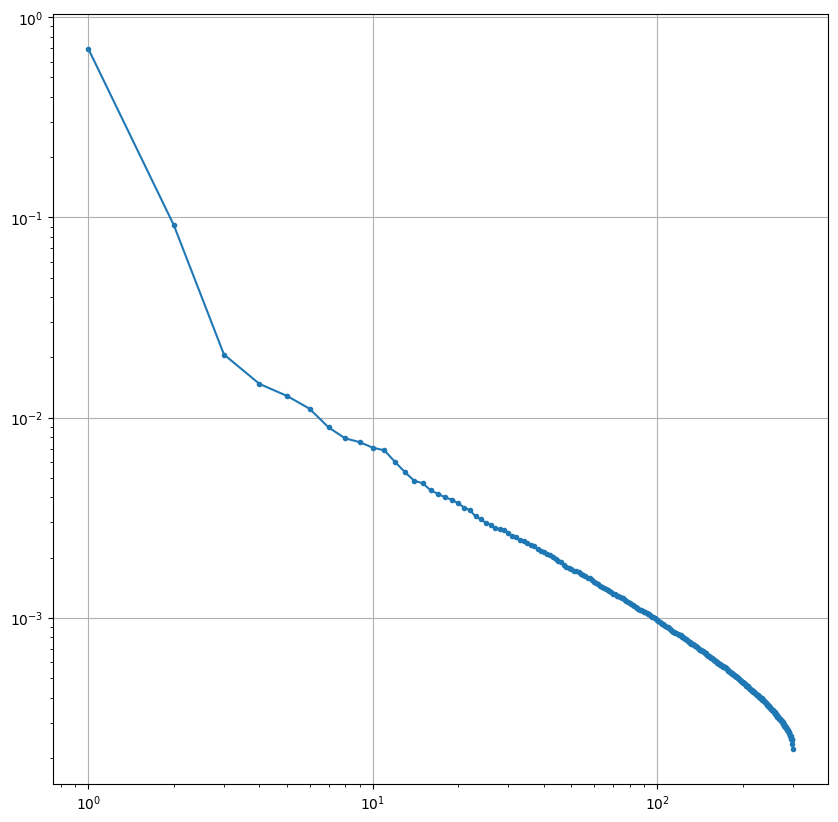

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_ylim(1e-4, 1e2)
ax.plot(pc_dim, pc_var, ".-")
